In [10]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [132]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False
all_cols = ['Grid Feed In', 'External Energy Supply', 'Internal Power Supply', 'Current Power', 'Self Consumption', 'Ambient Temperature', 'Module Temperature', 'Total Irradiation']

In [133]:
csv_path = 'data'
csv_file = os.path.join(os.getcwd(), csv_path, 'export_device_1_basic_aggregated_15minutes.csv.gz')
df = pd.read_csv(csv_file)
df.set_index(df.columns[0], inplace=True)
row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 125537


,Grid Feed In,External Energy Supply,Internal Power Supply,Current Power,Self Consumption,Ambient Temperature,Module Temperature,Total Irradiation,is_weekend
Datetime,,,,,,,,,
2021-11-06 11:00:00,9080.8,0.0,37015.066667,46095.866667,37015.066667,30.046667,57.706667,79.340000,True
2021-11-06 11:15:00,9427.4,1.6,37756.825000,47184.225000,37756.825000,30.140833,58.147500,80.698333,True
2021-11-06 11:30:00,11218.2,258.0,36041.425000,47259.625000,36041.425000,30.385833,57.361667,81.116667,True
2021-11-06 11:45:00,14011.4,0.0,33460.216667,47471.616667,33460.216667,31.025833,57.097500,80.676667,True
2021-11-06 12:00:00,11030.2,0.0,38093.108333,49123.308333,38093.108333,31.340000,56.047500,81.843333,True


In [134]:
# Ensure timestamp column is datetime type
if df.index.dtype != 'datetime64[ns]':
    df.index = pd.to_datetime(df.index)
    
print(df.index.year.unique())
print(df.index.year.value_counts())

Int64Index([2021, 2022, 2023, 2024, 2025], dtype='int64', name='Datetime')
2024    35136
2022    35040
2023    35040
2025    14989
2021     5332
Name: Datetime, dtype: int64


In [135]:
# Print missing data statistics
missing_count = df.isna().any(axis=1).sum()
print(f"Found {missing_count} missing timestamps out of {len(df.index)} expected")

Found 0 missing timestamps out of 125537 expected


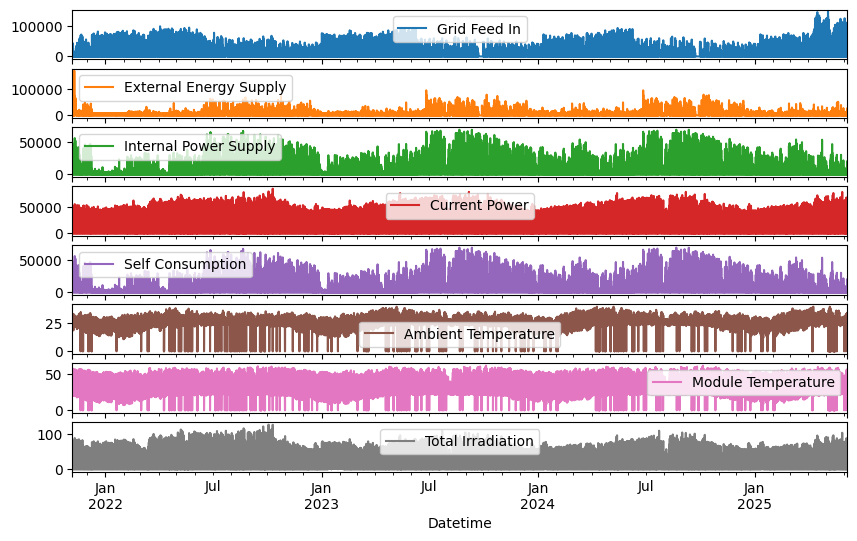

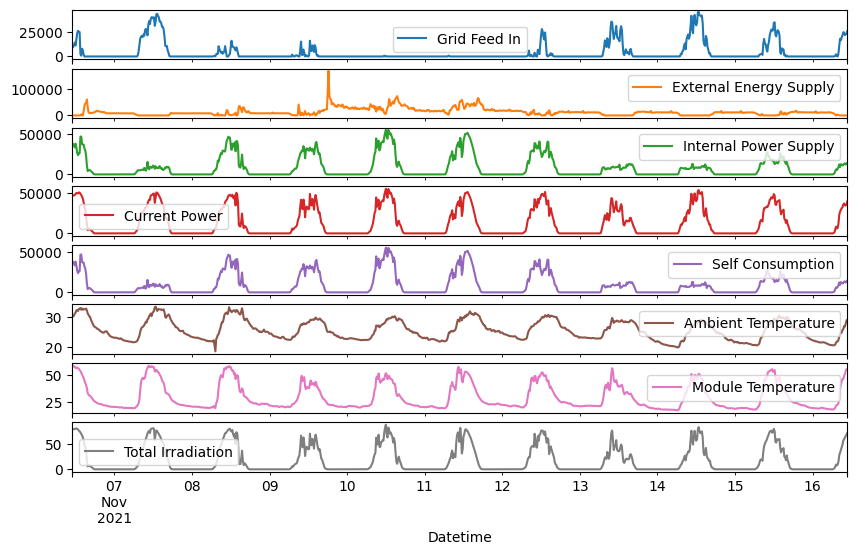

In [136]:
plot_cols = all_cols
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:960]
plot_features.index = df.index[:960]
_ = plot_features.plot(subplots=True)

In [137]:
# List of columns to check for zeros
zero_columns = [col for col in all_cols]

# Check which columns actually exist in the dataframe
valid_columns = [col for col in zero_columns if col in df.columns]
if len(valid_columns) != len(zero_columns):
    missing = set(zero_columns) - set(valid_columns)
    print(f"Warning: Some columns not found: {missing}")

mask_zeros = df[valid_columns].eq(0).all(axis=1)
zero_rows = df[mask_zeros].copy()
zero_rows

,Grid Feed In,External Energy Supply,Internal Power Supply,Current Power,Self Consumption,Ambient Temperature,Module Temperature,Total Irradiation,is_weekend
Datetime,,,,,,,,,
2021-11-24 14:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2021-12-03 03:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2021-12-04 21:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2022-03-02 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2022-03-13 11:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...
2024-08-26 21:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2024-11-24 14:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2024-12-03 03:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


Text(0, 0.5, 'Current Power')

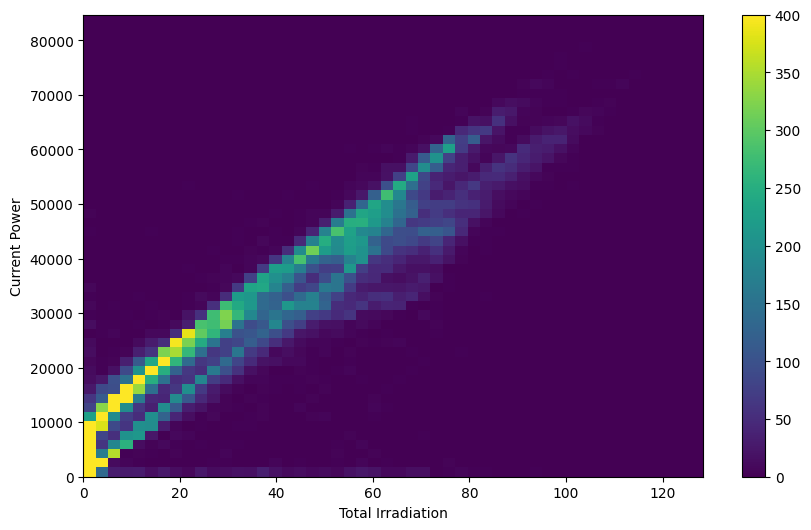

In [138]:
plt.hist2d(df['Total Irradiation'], df['Current Power'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Total Irradiation')
plt.ylabel('Current Power')

Text(0, 0.5, 'Current Power')

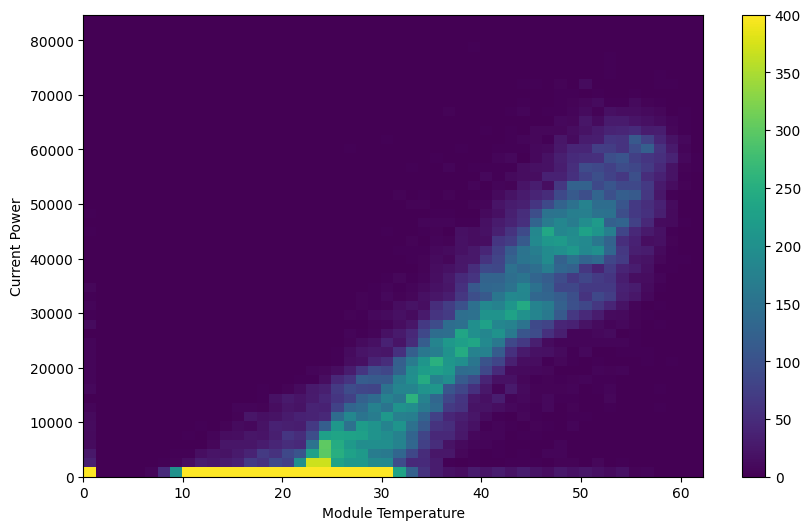

In [139]:
plt.hist2d(df['Module Temperature'], df['Current Power'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Module Temperature')
plt.ylabel('Current Power')

Text(0, 0.5, 'Self Consumption')

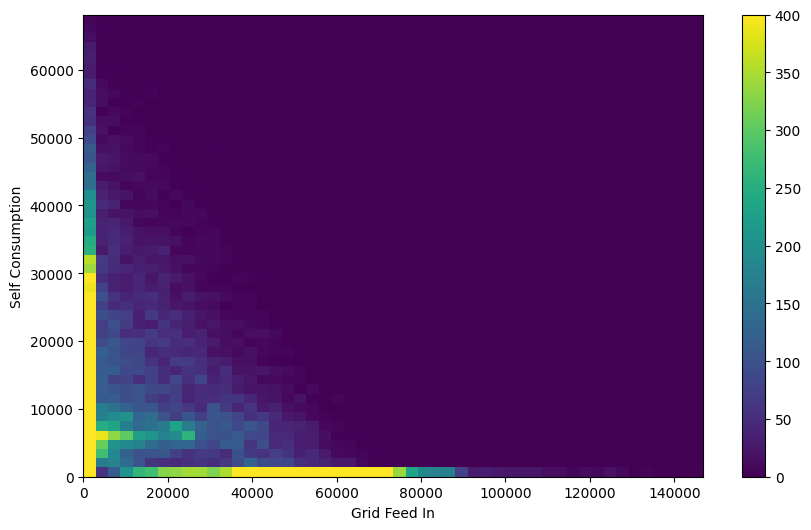

In [140]:
plt.hist2d(df['Grid Feed In'], df['Self Consumption'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Grid Feed In')
plt.ylabel('Self Consumption')

In [141]:
timestamp_s = df.index.map(pd.Timestamp.timestamp)

In [142]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

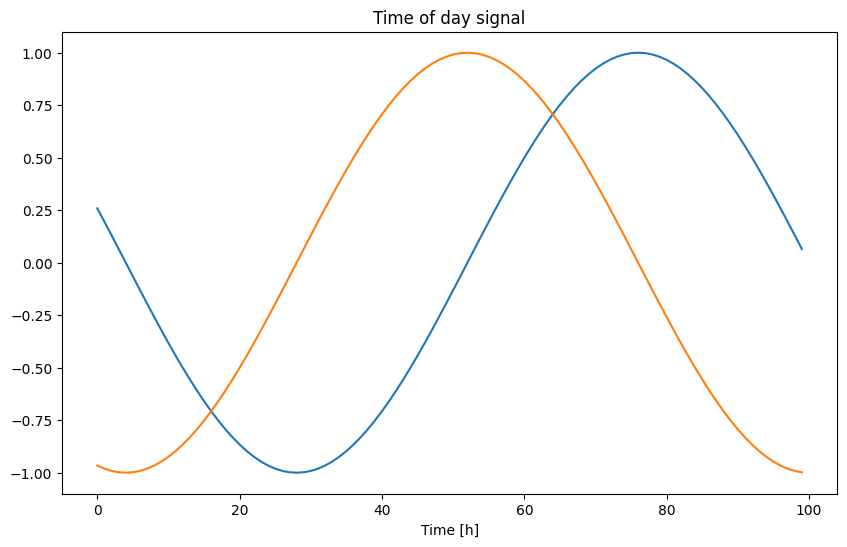

In [143]:
plt.plot(np.array(df['Day sin'])[:100])
plt.plot(np.array(df['Day cos'])[:100])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [144]:
field_name = 'Current Power'
fft = tf.signal.rfft(df[field_name])

In [145]:
fft

<tf.Tensor: shape=(62769,), dtype=complex64, numpy=
array([ 1.6067123e+09-2.20081250e+03j,  1.9294228e+06-9.09993875e+05j,
        2.6549735e+06-2.24426900e+07j, ...,
       -1.2128491e+05-2.09555453e+05j, -7.2587086e+04-1.24305414e+05j,
        3.3699984e+05-5.59467125e+05j], dtype=complex64)>

In [146]:
f_per_dataset = np.arange(0, len(fft))
f_per_dataset

array([    0,     1,     2, ..., 62766, 62767, 62768])

In [147]:
n_samples_h = len(df[field_name])
m15_minutes_per_year = (60/15)*24*365.2524
years_per_dataset = n_samples_h/(m15_minutes_per_year) # result in number of years of dataset
years_per_dataset

3.5802012069827147

In [148]:
f_per_year = f_per_dataset/years_per_dataset # scale to 1/years_per_dataset
f_per_year

array([0.00000000e+00, 2.79313911e-01, 5.58627821e-01, ...,
       1.75314169e+04, 1.75316962e+04, 1.75319755e+04])

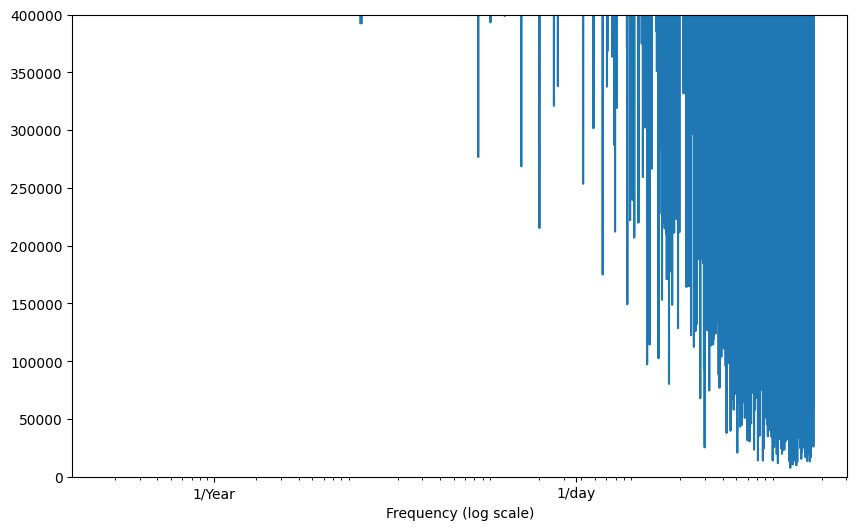

In [149]:
plt.step(f_per_year, np.abs(fft)) # x = f_per_year, y = np.abs(fft)
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')